In [1]:
pip install mlxtend matplotlib networkx


In [2]:
# Import necessary libraries
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import networkx as nx

In [5]:

# Load the dataset
df = pd.read_csv('My_movies.csv')
df

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [6]:
# Explore the dataset
print(df.head())

            V1       V2             V3          V4     V5  Sixth Sense  \
0  Sixth Sense    LOTR1  Harry Potter1  Green Mile  LOTR2            1   
1    Gladiator  Patriot     Braveheart         NaN    NaN            0   
2        LOTR1    LOTR2            NaN         NaN    NaN            0   
3    Gladiator  Patriot    Sixth Sense         NaN    NaN            1   
4    Gladiator  Patriot    Sixth Sense         NaN    NaN            1   

   Gladiator  LOTR1  Harry Potter1  Patriot  LOTR2  Harry Potter2  LOTR  \
0          0      1              1        0      1              0     0   
1          1      0              0        1      0              0     0   
2          0      1              0        0      1              0     0   
3          1      0              0        1      0              0     0   
4          1      0              0        1      0              0     0   

   Braveheart  Green Mile  
0           0           1  
1           1           0  
2           0       

In [7]:

# Preprocess the data for Apriori algorithm
transactions = []
for i in range(df.shape[0]):
    transactions.append([str(df.values[i, j]) for j in range(df.shape[1]) if pd.notna(df.values[i, j])])


In [8]:

# Encode the transactions
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [9]:

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)

In [10]:

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

In [11]:
# Display the association rules
print("Association Rules:")
print(rules)

Association Rules:
                       antecedents                                consequents  \
0                              (1)                                        (0)   
1                              (0)                                        (1)   
2                     (Braveheart)                                        (0)   
3                              (0)                                (Gladiator)   
4                      (Gladiator)                                        (0)   
...                            ...                                        ...   
1428           (LOTR1, Green Mile)  (LOTR2, 1, 0, Harry Potter1, Sixth Sense)   
1429   (Green Mile, Harry Potter1)          (LOTR2, 1, LOTR1, 0, Sixth Sense)   
1430        (LOTR1, Harry Potter1)     (LOTR2, 1, Green Mile, 0, Sixth Sense)   
1431          (LOTR1, Sixth Sense)   (LOTR2, 1, Green Mile, 0, Harry Potter1)   
1432  (Harry Potter1, Sixth Sense)           (LOTR2, 1, Green Mile, LOTR1, 0)   

      an

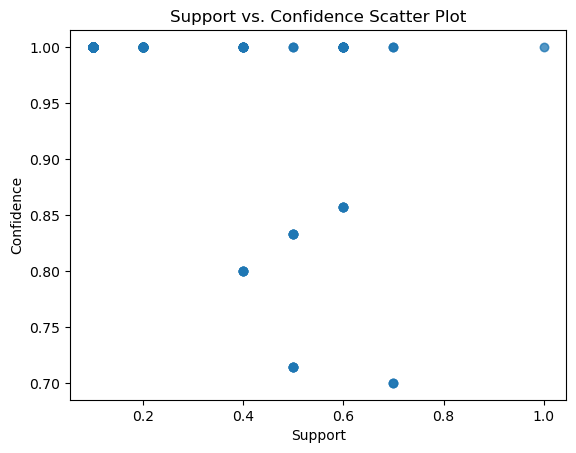

In [12]:
# Visualization 1: Scatter plot of support vs. confidence
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs. Confidence Scatter Plot')
plt.show()

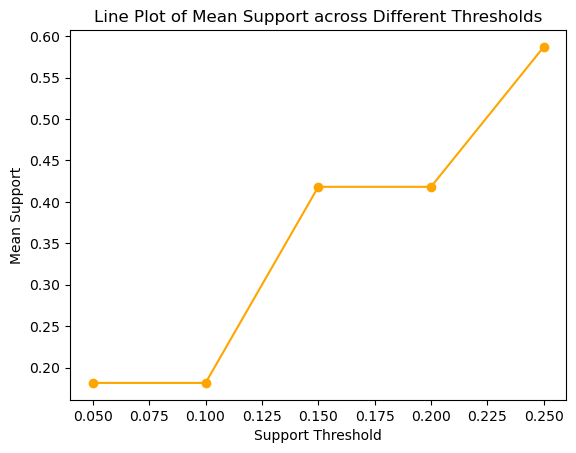

In [13]:

# Visualization : Line plot of support values across different support thresholds
support_thresholds = [0.05, 0.1, 0.15, 0.2, 0.25]  # Adjust the thresholds as needed
support_values = []

for threshold in support_thresholds:
    frequent_itemsets = apriori(df_encoded, min_support=threshold, use_colnames=True)
    support_values.append(frequent_itemsets['support'].mean())

plt.plot(support_thresholds, support_values, marker='o', linestyle='-', color='orange')
plt.xlabel('Support Threshold')
plt.ylabel('Mean Support')
plt.title('Line Plot of Mean Support across Different Thresholds')
plt.show()





In [14]:
# Print final observations
print("Observations:")

print("- The scatter plot shows the distribution of support and confidence values.")


print("- The line plot shows how mean support values change across different support thresholds.")


Observations:
- The scatter plot shows the distribution of support and confidence values.
- The line plot shows how mean support values change across different support thresholds.


In [15]:
# Apriori algorithm to find frequent itemsets
min_support_values = [0.1, 0.05, 0.01]  # Try different min_support values
rules_list = []



In [17]:
for min_support in min_support_values:
    frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)
    
    # Association rules
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
    
    # Pruning redundant rules
    rules = rules[~rules.index.isin(rules_list)]
    
    rules_list.append(rules)




In [18]:
# Display rules for different min_support values
for i, rules in enumerate(rules_list):
    print(f"\nRules for min_support={min_support_values[i]}:")
    print(rules)


Rules for min_support=0.1:
                       antecedents  \
0                              (1)   
1                              (0)   
2                     (Braveheart)   
3                              (0)   
4                      (Gladiator)   
...                            ...   
2231  (Harry Potter1, Sixth Sense)   
2232                       (LOTR2)   
2233                  (Green Mile)   
2234                       (LOTR1)   
2235               (Harry Potter1)   

                                            consequents  antecedent support  \
0                                                   (0)                 1.0   
1                                                   (1)                 1.0   
2                                                   (0)                 0.1   
3                                           (Gladiator)                 1.0   
4                                                   (0)                 0.7   
...                                      

IndexError: list index out of range